(60000, 28, 28)


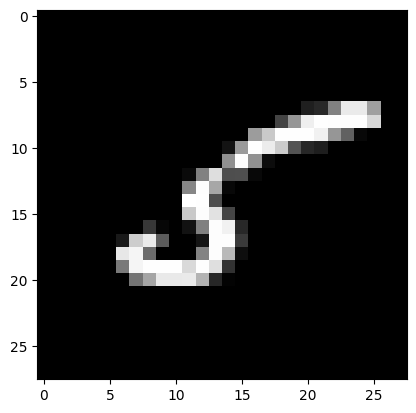

Epoch 1/40


2023-01-05 21:40:50.352018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-05 21:40:50.461572: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  1/106 [..............................] - ETA: 2:13 - loss: 2.2743 - accuracy: 0.1211

2023-01-05 21:40:50.692100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


106/106 [==============================] - ETA: 0s - loss: 1.2279 - accuracy: 0.6089

2023-01-05 21:40:54.257945: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-05 21:40:54.296666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 0.70753, saving model to Best_GRU_100.hdf5
106/106 [==============================] - 5s 36ms/step - loss: 1.2279 - accuracy: 0.6089 - val_loss: 0.7075 - val_accuracy: 0.7648
Epoch 2/40
105/106 [============================>.] - ETA: 0s - loss: 0.6575 - accuracy: 0.7798
Epoch 2: val_loss improved from 0.70753 to 0.52048, saving model to Best_GRU_100.hdf5
106/106 [==============================] - 3s 31ms/step - loss: 0.6567 - accuracy: 0.7801 - val_loss: 0.5205 - val_accuracy: 0.8233
Epoch 3/40
105/106 [============================>.] - ETA: 0s - loss: 0.5340 - accuracy: 0.8191
Epoch 3: val_loss improved from 0.52048 to 0.44658, saving model to Best_GRU_100.hdf5
106/106 [==============================] - 3s 30ms/step - loss: 0.5339 - accuracy: 0.8192 - val_loss: 0.4466 - val_accuracy: 0.8527
Epoch 4/40
105/106 [============================>.] - ETA: 0s - loss: 0.4738 - accuracy: 0.8402
Epoch 4: val_loss improved from 0.44658 to 0.40887, saving mo

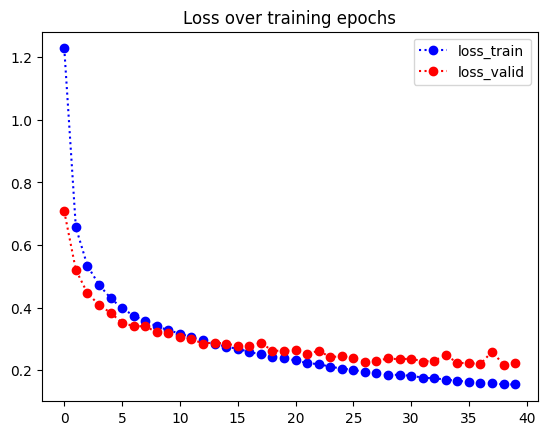

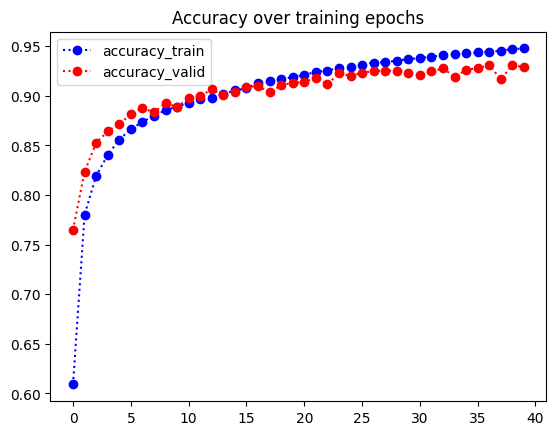

313/313 [==============================] - 3s 10ms/step - loss: 0.2716 - accuracy: 0.9143


In [38]:
import keras
from keras.datasets import mnist
#from tensorflow.keras.utils import to_categorical
from keras.utils import to_categorical
from keras.layers import Dense, Input, LSTM, GRU, SimpleRNN
from keras.optimizers import RMSprop
# tensorflow.from keras.optimizers import RMSprop
#from keras.engine import Model
from tensorflow.keras.models import Model
from keras.callbacks import ModelCheckpoint
#from tensorflow.keras.callbacks import ModelCheckpoint


import numpy as np
import matplotlib.pyplot as plt

def mlp_network(nb_features):
    """ Multilayer Perceptron
    nb_features = length of the input vector
    """
    inputs = Input(name='input', shape=(nb_features,))
    layer = Dense(64, activation='relu')(inputs)
    layer = Dense(64, activation='relu')(layer)
    predictions = Dense(10, activation='softmax')(layer)
    network = Model(inputs=inputs, outputs=predictions)
    network.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return network

def rnn_classif_network(T, D, RNN_TYPE):
    """ Recurrent Neural Network 
    T = sequence length
    D = number of features per frame
    """

    inputs = Input(name='input', shape=[T, D])
    if RNN_TYPE == 'LSTM':
        layer = LSTM(100, return_sequences=True)(inputs)
        layer1 = LSTM(100, return_sequences=False)(layer)
        predictions = Dense(10, activation='softmax')(layer1)
    elif RNN_TYPE == 'RNN':
        layer = SimpleRNN(50, return_sequences=True)(inputs)
        layer1 = SimpleRNN(50, return_sequences=False)(layer)
        predictions = Dense(10, activation='softmax')(layer1)
    elif RNN_TYPE == 'GRU':
        layer = GRU(100, return_sequences=False)(inputs)
        #layer1 = GRU(100, return_sequences=False)(layer)
        predictions = Dense(10, activation='softmax')(layer)

    network = Model(inputs=inputs, outputs=predictions)
    network.compile(optimizer='rmsprop',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return network

if __name__ == '__main__':

    # x are of dimension nb_data 28 x 28 which is the size of each image
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    print(x_train.shape)
    # see the  11th image 
    plt.imshow(x_train[11,:,:], cmap='gray')
    plt.show()
    
    nb_classes = 10
    nb_train, T, D = x_train.shape
    nb_test, T, D = x_test.shape
    
    # keep somme data for validation
    END_TRAINING = 54000
    START_VALID = 54000
    
    x_valid = x_train[START_VALID:,:,:] 
    y_valid = y_train[START_VALID:] 

    x_train = x_train[:END_TRAINING,:,:] 
    y_train = y_train[:END_TRAINING] 
    
    ###########################################################################
    # one hiot encoding of the ground truth
    # Y-train [20000,10]]
    y_train = to_categorical(y_train, nb_classes)
    y_test  = to_categorical(y_test, nb_classes)
    y_valid = to_categorical(y_valid, nb_classes)
    
    #model_name = "LSTM_50.epoch{epoch:02d}.hdf5"
    model_name = 'Best_GRU_100.hdf5'
    ###########################################################################
    # declare and compile the network 
    net = rnn_classif_network(T, D,'GRU')
    # set a checkpoint for saving the best valid model over the training iterations 
    checkpoint = ModelCheckpoint(filepath=model_name, 
                             monitor ='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')
    ###########################################################################
    # Training the network with a batch size 512 using the specified validation dataset
    # nb_epoch = 40
    # returns the learning history  
    Enregistrement = net.fit(x_train, y_train,
                             batch_size=512,
                             validation_data=(x_valid,y_valid),
                             epochs=40,
                             callbacks=[checkpoint])
    print(Enregistrement.history.keys())
    ###########################################################################
    # plot the training history
    loss_train = Enregistrement.history['loss']
    loss_valid = Enregistrement.history['val_loss']    
    metric_train = Enregistrement.history['accuracy']    
    metric_valid = Enregistrement.history['val_accuracy']    
        
    plt.plot(loss_train,"b:o", label = "loss_train")
    plt.plot(loss_valid,"r:o", label = "loss_valid") 
    
    plt.title("Loss over training epochs")
    plt.legend()
    plt.show()
  
    plt.plot(metric_train,"b:o", label = "accuracy_train")
    plt.plot(metric_valid,"r:o", label = "accuracy_valid") 
    plt.title("Accuracy over training epochs")
    plt.legend()
    plt.show()
    ###########################################################################
    #    Let's load the best saved model and test on the test dataset
    model = keras.models.load_model(model_name)
    loss_test = net.evaluate(x_test, y_test)
    #print("\nTEST LOSS AND ACCURACY = ", loss_test)
    


